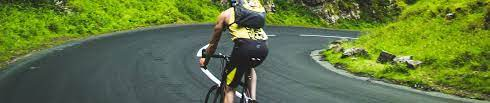


## Project Summary. 
Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. In order to predict the trip duration, data mining techniques are employed in this project to predict the trip duration of rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination of Seoul Bike data and weather data.
## Please use the Seoul Bike dataset. 

- What are the factors that influence the number of bikes rented? 
- Explore the data for outliers and missing values.
- Plot the correlation between the variables and state your comments
- Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
- Coment on Model performance by using approapriate diagnostics and measures.

Good Luck!

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [150]:
df = pd.read_csv("SeoulBikeData.csv")

In [151]:
df.shape

(8760, 14)

In [152]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [153]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [155]:
miss_val = df.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [156]:
df.describe(include=object)

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,25/03/2018,Spring,No Holiday,Yes
freq,24,2208,8328,8465


In [157]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [158]:
x = set(df.Seasons)
y = set(df.Holiday)
z = set(df['Functioning Day'])
print(x)
print(y)
print(z)

{'Summer', 'Autumn', 'Spring', 'Winter'}
{'No Holiday', 'Holiday'}
{'Yes', 'No'}


In [159]:
x = df[['Rented Bike Count','Seasons']]
x = x.groupby('Seasons').sum()
x.head()

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


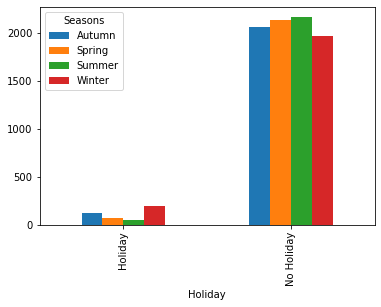

In [160]:
pd.crosstab(df['Seasons'], df['Holiday']).T.plot(kind = 'bar', stacked = False);

In [161]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# A

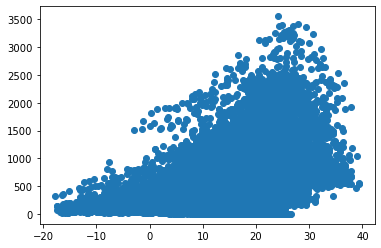

In [162]:
%matplotlib inline
plt.scatter(df['Temperature(C)'],df['Rented Bike Count'])

- Temp and Rented bike share a postive correlation, few outliers but the are in same direction 

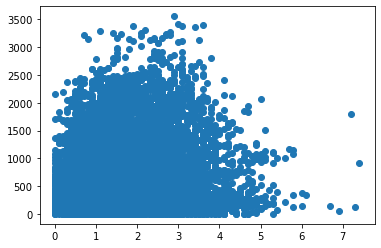

In [163]:
%matplotlib inline
plt.scatter(df['Wind speed (m/s)'],df['Rented Bike Count'])

Wind speed and bikes rented show that up until 5m/s there is a positive correlation.

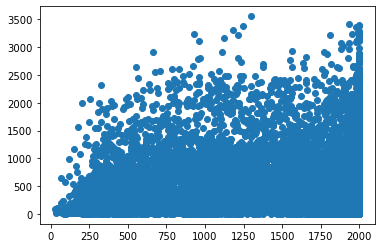

In [164]:
%matplotlib inline
plt.scatter(df['Visibility (10m)'],df['Rented Bike Count'])

This plot shows a positive correlation as well the more visible it is the more bikes are rented.

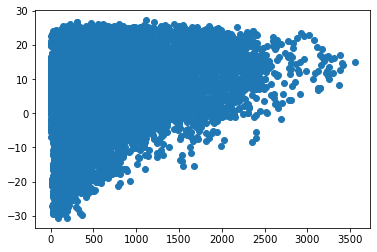

In [165]:
%matplotlib inline
plt.scatter(df['Rented Bike Count'],df['Dew point temperature(C)'])

This one also shows positive correlation meaning the higher the temp the more bikes are rented until around 30dergrees(C).

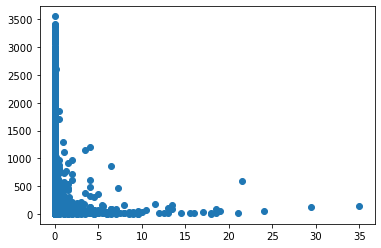

In [166]:
%matplotlib inline
plt.scatter(df['Rainfall(mm)'],df['Rented Bike Count'])

This graph shows that people are more inclided to rent a bike the less (mm) of rainfall there is.

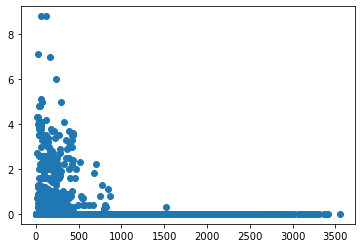

In [167]:
%matplotlib inline
plt.scatter(df['Rented Bike Count'],df['Snowfall (cm)'])

Snowfall rarely occurs so its not an important marker but people rent less bikes the more it snows in (cm)

Snowfall and Rainfall are the biggest factors in deciding on whether people will rent bikes or not. Temperature, Wind Speed, Dew point Temp, Visibility also play a big role in deciding whether people are more inclined to rent or not. Snowfall only happens a couple times a year so its not as important.

# B

In [168]:
miss_val = df.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

* No missing values.

In [169]:
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

In [170]:
max_threshold= df['Rented Bike Count'].quantile(.998)
max_threshold

3168.892

In [171]:
df[df['Rented Bike Count']>max_threshold]

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4290,28/05/2018,3245,18,26.0,39,2.7,1950,10.9,1.07,0.0,0.0,Spring,No Holiday,Yes
4338,30/05/2018,3251,18,23.6,42,2.1,2000,9.9,1.23,0.0,0.0,Spring,No Holiday,Yes
4458,04/06/2018,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes
4482,05/06/2018,3227,18,27.1,40,2.8,1811,12.3,1.00,0.0,0.0,Summer,No Holiday,Yes
4530,07/06/2018,3221,18,25.6,57,2.7,1217,16.4,0.96,0.0,0.0,Summer,No Holiday,Yes
4554,08/06/2018,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes
4650,12/06/2018,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4818,19/06/2018,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes
4842,20/06/2018,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
4866,21/06/2018,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes


In [172]:
min_threshold= df['Rented Bike Count'].quantile(.035)
min_threshold

5.0

In [173]:
df[df['Rented Bike Count']<min_threshold]

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
559,24/12/2017,3,7,4.7,89,1.1,100,3.0,0.00,0.0,0.0,Winter,Holiday,Yes
560,24/12/2017,4,8,4.6,91,1.7,95,3.2,0.00,0.0,0.0,Winter,Holiday,Yes
561,24/12/2017,3,9,4.6,94,0.9,90,3.7,0.00,6.4,0.0,Winter,Holiday,Yes
562,24/12/2017,4,10,4.8,96,0.6,87,4.2,0.04,0.0,0.0,Winter,Holiday,Yes
564,24/12/2017,4,12,4.1,91,0.8,404,2.7,0.07,9.5,0.0,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.00,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.00,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.00,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.00,0.0,0.0,Autumn,No Holiday,No


In [174]:
df.shape

(8760, 14)

In [175]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# C

In [176]:
np.corrcoef(df['Rented Bike Count'],df['Temperature(C)'])

array([[1.        , 0.53855815],
       [0.53855815, 1.        ]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rented Bike Count', ylabel='Temperature(C)'>

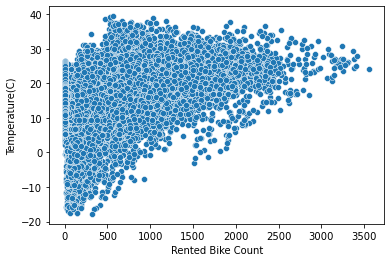

In [177]:
sns.scatterplot(df['Rented Bike Count'],df['Temperature(C)'])

In [178]:
df.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<AxesSubplot:>

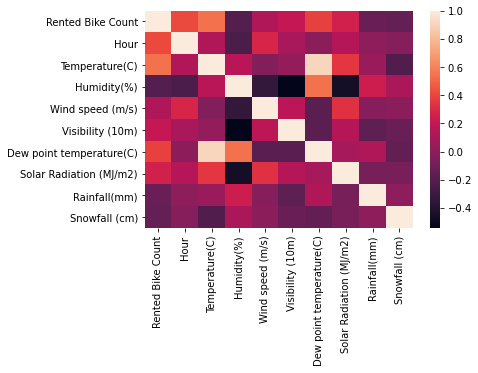

In [179]:
sns.heatmap(df.corr())

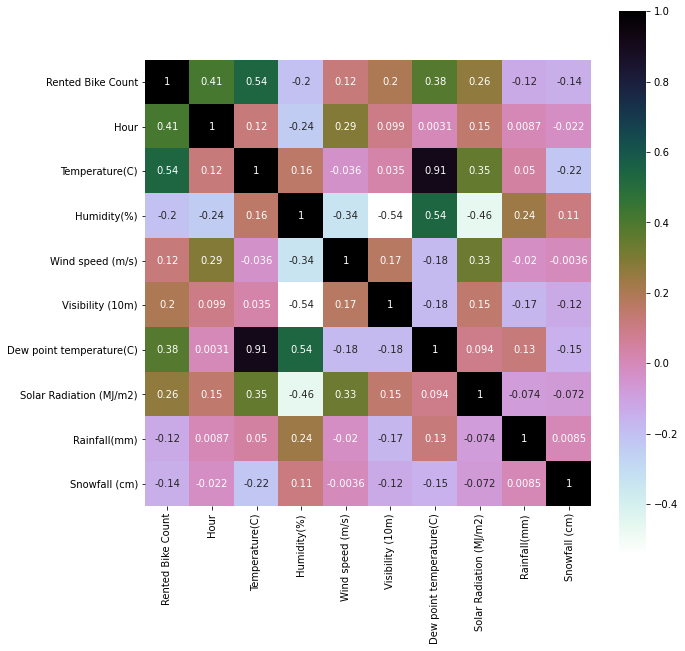

In [180]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

From the heatmap I can cleary see hour,Temp and Dew point Temperature have the highest correlation with number of rented bikes.

In [181]:
df.drop('Date',axis='columns', inplace=True)

In [182]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features

df_categoric_features = df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [183]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [184]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df= pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df.tail()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,1,1
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,0,0,0,1,1


# D

In [185]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.25)

In [199]:
#Spliting dataframe into train and test by manually as intially we have two dataframes train and test.
df_train = df[2190:]
df_test = df[2190:]

In [200]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [201]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (6570, 14)
Dimension of train_y dataframe: (6570,)
Dimension of val_x dataframe: (2190, 14)
Dimension of val_y dataframe: (2190,)


In [202]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [203]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 319.7996704167725
Mean Square Error of linear regression: 184133.95388109668
R_Squared Score of linear regression: 0.2113635148167271


In [211]:
X = df.drop(['Rented Bike Count'], axis = 1)

# extract the target variable from the data set
y = df[['Rented Bike Count']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (6132, 14)
The shape of X_test is: (2628, 14)
The shape of y_train is: (6132, 1)
The shape of y_test is: (2628, 1)


In [212]:
import statsmodels.api as sm
linreg_full_model = sm.OLS(train_y['Rented Bike Count'], train_x).fit()

# print the summary output
print(linreg_full_model.summary())

KeyError: 'Rented Bike Count'

In [205]:
predic_test = ln_reg.predict(df_test)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Id':test.Id,'RBC':predic_test})
submission_data
val_y = pd.DataFrame(val_y)
val_y['Predicted'] = submission_data['Pred_RBC']

val_y

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 15)